#**Jigyasa Bajpai N007**

#**Ritika Chand N009**

#**Paramshree Tinjan N062**

MBA Tech CS

3rd year 5th semester

IBM PRAD Project

# **Anamoly Detection Using Isolation Forest**

**Anomaly detection** is the process of finding outliers in the data, i.e. points that are significantly different from the majority of the other data points.

Anomaly detection has wide applications across industries. Below are some of the popular use cases:

**Banking:** Finding abnormally high deposits. 

**Finance:** Finding the pattern of fraudulent purchases. 

**Healthcare:** Detecting fraudulent insurance claims and payments.

**Manufacturing:** Abnormal machine behavior can be monitored for cost control. 

**Networking:** Detecting intrusion into networks. 

**Isolation forest** is a machine learning algorithm for anomaly detection.
It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data.

In general the first step to anomaly detection is to construct a profile of what's "normal", and then report anything that cannot be considered normal as anomalous. However, the isolation forest algorithm does not work on this principle; it does not first define "normal" behavior, and it does not calculate point-based distances.

Isolation Forest instead works by explicitly isolating anomalous points in the dataset. 

The Isolation Forest algorithm is based on the principle that anomalies are observations that are few and different, which should make them easier to identify. It uses an ensemble of Isolation Trees for the given data points to isolate anomalies.

Isolation Forest is based on the Decision Tree algorithm. It recursively generates partitions on the dataset by randomly selecting a feature from the given set of features, and then randomly selecting a split value between the max and min values of that feature. The anomalies need fewer random partitions to be isolated compared to "normal" points in the dataset, so the anomalies will be the points which have a smaller path length in the tree, where path length is the number of edges traversed from the root node.

Using Isolation Forest, we can not only detect anomalies faster but we also require less memory compared to other algorithms. As anomalous data points mostly have shorter tree paths than the normal data points, trees in the isolation forest do not need to have a large depth, and so a smaller max_depth can be used resulting in low memory requirement.

This algorithm works very well with a small data set as well.

**Salary Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


We'll create a model variable and instantiate the IsolationForest class. We are passing the values of four parameters to the Isolation Forest method, listed below.

**Number of estimators:** n_estimators refers to the number of base estimators or trees in the ensemble, i.e. the number of trees that will get built in the forest. This is an integer parameter and is optional. The default value is 100.

**Max samples:** max_samples is the number of samples to be drawn to train each base estimator. If max_samples is more than the number of samples provided, all samples will be used for all trees. The default value of max_samples is 'auto'. If 'auto', then max_samples=min(256, n_samples)

**Contamination:** It refers to the expected proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples. 

**Max features:** All the base estimators are not trained with all the features available in the dataset. max_features is the number of features to draw from the total features, to train each base estimator or tree.The default value of max features is 1.

In [ ]:
model = IsolationForest(n_estimators = 50, max_samples = 'auto', contamination = float(0.1), max_features = 1.0)
model.fit(df[['Salary']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

We can find the values of 'Scores' column by calling decision_function() of the trained model and passing the Salary as parameter.

Similarly we can find the values of 'Anomaly' column by calling the predict() function of the trained model and passing the Salary as parameter.

In [ ]:
df['Scores'] = model.decision_function(df[['Salary']])
df['Anomaly'] = model.predict(df[['Salary']])
df.head(20)

,YearsExperience,Salary,Scores,Anomaly
0,1.1,39343.0,0.023562,1
1,1.3,46205.0,0.005526,1
2,1.5,37731.0,-0.055536,-1
3,2.0,43525.0,0.001317,1
4,2.2,39891.0,0.026409,1
5,2.9,56642.0,0.157266,1
6,3.0,60150.0,0.122562,1
7,3.2,54445.0,0.096266,1
8,3.2,64445.0,0.115290,1
9,3.7,57189.0,0.157095,1


A negative score value and a -1 for the value of anomaly columns indicate the presence of anomaly. A value of 1 for the anomaly represents the normal data.

In [ ]:
anomaly = df.loc[df['Anomaly'] == -1]
anomaly_index = list(anomaly.index)
print(anomaly)

    YearsExperience    Salary    Scores  Anomaly
2               1.5   37731.0 -0.055536       -1
28             10.3  122391.0 -0.031846       -1
29             10.5  121872.0 -0.011856       -1


In [ ]:
outliers_counter = len(df[df['Salary'] > 115000])
outliers_counter

3

In [ ]:
print("Accuracy Percentage:", 100 * list(df['Anomaly']).count(-1)/(outliers_counter))

Accuracy Percentage: 100.0


**Toy Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import IsolationForest

Creating array of data samples

In [ ]:
X = np.array([[9, 17], [10, 15] ,[9, 16], [11, 17], [12, 17],
                          [10, 21], [12, 18], [13, 20], [10, 21], [12, 13],
                          [9, 15], [14, 14], [90, 30], [92, 28], [15, 15],
                          [13, 14], [13, 16], [14, 16], [13, 16], [15, 17]])

In [ ]:
new_data = pd.DataFrame(np.array(X), columns=['A', 'B'])

[6.0, 4.0]


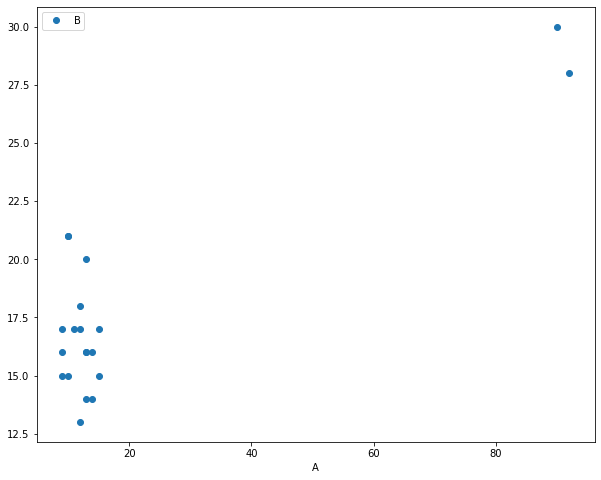

In [ ]:
import matplotlib.pyplot as plt
print(plt.rcParams.get("figure.figsize"))     
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
new_data.plot(x = 'A', y = 'B', style = 'o')

We observe that the data points at the top right i.e. points (90, 30) and (92, 28) are the outliers. Next we check the isolation forest algorithm also declares these points as outliers or not.

In [ ]:
iso_forest = IsolationForest(n_estimators = 300, contamination = 0.10) #10% anamolous data 
iso_forest = iso_forest.fit(new_data)

In [ ]:
isof_outliers = iso_forest.predict(new_data)

In [ ]:
isoF_outliers_values = new_data[iso_forest.predict(new_data) == -1]

The outliers are assigned a value of -1, therefore we can get actual data points by passing the result of the “predict” function to our dataset

In [ ]:
isoF_outliers_values

,A,B
12,90,30
13,92,28


In [ ]:
# Thus (90, 30) and (92, 28) points are outliers

**Marks Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/mark.csv')
data.head(10)

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi
5,6,69,Gwalior
6,7,52,Bhopal
7,8,54,Chennai
8,9,55,Delhi
9,10,94,Mumbai


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


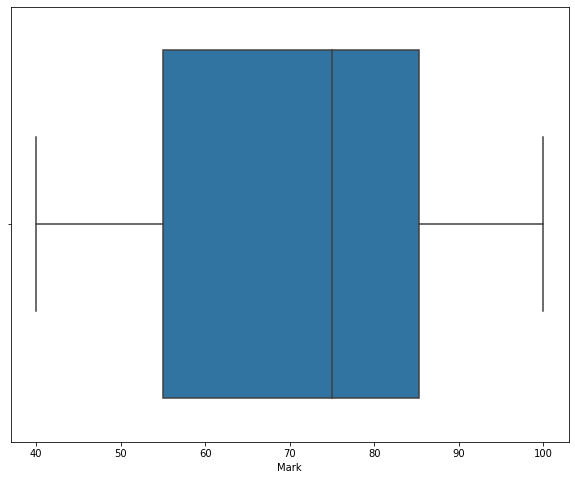

In [ ]:
sns.boxplot(data.Mark)

In [ ]:
random_state = np.random.RandomState(42)
model = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = random_state)
model.fit(data[['Mark']])
print(model.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F2C4AE5AAF0, 'verbose': 0, 'warm_start': False}


In [ ]:
data['Scores'] = model.decision_function(data[['Mark']])
data['Anomaly Score'] = model.predict(data[['Mark']])
data[data['Anomaly Score'] == -1].head()

,Student_id,Mark,City,Scores,Anomaly Score
0,1,95,Chennai,-0.019138,-1
9,10,94,Mumbai,-0.013488,-1
16,17,68,Gwalior,-0.002922,-1
17,18,51,Bhopal,-0.001737,-1
26,27,45,Kochi,-0.007247,-1


Giving threshold 41

In [ ]:
anomaly_count = len(data[data["Mark"] < 41])
anomaly_count

3

**Iris Dataset**

In [ ]:
import plotly.express as px #contains functions that can create entire figures at once
# We'll use it to plot the histogram and 3d scatter plot for anamolies
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

In [ ]:
import pandas as pd
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# We define our X and y variables
X, y = data.data, data.target

**contamination** is the proportion of anomalies in the dataset. In this case, we fix it equal to 0.05.<br>
**max_samples** is the maximum number of samples to consider from the features matrix X. We’ll use all the samples. <br>
**max_features** is the maximum number of features that can be considered during the training of the model. We’ll use all four features. <br>
**n_estimators** is the number of isolation trees considered. We’ll use 100 estimators.

In [ ]:
# Defining the Isolation forest
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=4, 
                          bootstrap=False, n_jobs=-1, random_state=1)
# contamination is basically proportion of outliers in the data set
# n_jobs = -1, means the number of jobs to run in parallel for both fit and predict, here -1 means using all processors.
# random state as 1 so that we get the same output every time.

In [ ]:
# Predicting using isolation forest model
pred= iforest.fit_predict(X)
# We are adding a column for scores that our model generates for different data points
df['scores']=iforest.decision_function(X)
# We are adding a column for prediction as 1 and -1 for the anamoly label
df['anomaly_label']=pred

In [ ]:
# Printing all the values with anamoly label as -1 i.e. all the predicted anamoly values
df[df.anomaly_label == -1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),scores,anomaly_label
13,4.3,3.0,1.1,0.1,-0.039348,-1
15,5.7,4.4,1.5,0.4,-0.003695,-1
41,4.5,2.3,1.3,0.3,-0.038883,-1
60,5.0,2.0,3.5,1.0,-0.009057,-1
109,7.2,3.6,6.1,2.5,-0.039718,-1
117,7.7,3.8,6.7,2.2,-0.048070,-1
118,7.7,2.6,6.9,2.3,-0.055477,-1
131,7.9,3.8,6.4,2.0,-0.065966,-1


In [ ]:
# Printing all the values with anamoly label as 11 i.e. all the predicted values that are not anamoly
df[df.anomaly_label == 1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),scores,anomaly_label
0,5.1,3.5,1.4,0.2,0.178371,1
1,4.9,3.0,1.4,0.2,0.148701,1
2,4.7,3.2,1.3,0.2,0.128519,1
3,4.6,3.1,1.5,0.2,0.119495,1
4,5.0,3.6,1.4,0.2,0.169390,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.131723,1
146,6.3,2.5,5.0,1.9,0.122604,1
147,6.5,3.0,5.2,2.0,0.160598,1
148,6.2,3.4,5.4,2.3,0.072578,1


In [ ]:
# We divide the datapoints in to anamoly values as 'inlier' and 'outlier' and add a column for the same
df['anomaly']=df['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')
# We plot a histogram for the scores
fig=px.histogram(df, x='scores', color='anomaly')
fig.show()

In [ ]:
# We plot a 3d scatter plot since we have 3 variables 
# scatter_3d plots individual data in three-dimensional space. A 4th dimension of the data can be represented thanks to the color of the markers.
fig = px.scatter_3d(df,x='petal width (cm)',
                       y='sepal length (cm)',
                       z='sepal width (cm)',
                       color='anomaly')
fig.show()

In [ ]:
from sklearn.tree import export_graphviz
# Graphviz is an open-source python module that is used to create graph objects, which can be completed using different nodes and edges.
from subprocess import call
# The Python subprocess call() function returns the executed code of the program.
# If there is no program output, the function will return the code that it executed successfully.
from IPython.display import Image
# Plotting a tree
estimator = iforest.estimators_[5]
export_graphviz(estimator,out_file='tree.dot',max_depth=5,
                feature_names = data.feature_names,
                special_characters=True,rounded=True,precision=2)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

In [ ]:
# The first decision rule takes the petal length as feature and the partitioning point is 2.8
# It seems that a very small petal width or very big petal width determines whether an item is anomalous or not.
# Filtering in the dataframe
df[(df['petal width (cm)'] <= 0.13)|(df['petal width (cm)'] >= 2.46)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),scores,anomaly_label,anomaly
9,4.9,3.1,1.5,0.1,0.099141,1,inlier
12,4.8,3.0,1.4,0.1,0.081764,1,inlier
13,4.3,3.0,1.1,0.1,-0.039348,-1,outlier
32,5.2,4.1,1.5,0.1,0.032563,1,inlier
37,4.9,3.6,1.4,0.1,0.087219,1,inlier
100,6.3,3.3,6.0,2.5,0.050541,1,inlier
109,7.2,3.6,6.1,2.5,-0.039718,-1,outlier
144,6.7,3.3,5.7,2.5,0.071714,1,inlier


In [ ]:
# Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.0,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.0,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.0,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000
scores,150.0,0.112454,0.055353,-0.065966,0.084388,0.125855,0.152323,0.186361
anomaly_label,150.0,0.893333,0.450900,-1.000000,1.000000,1.000000,1.000000,1.000000


**Limitations of Isolation Forest**

Isolation Forests are computationally efficient and have been proven to be very effective in Anomaly Detection. Despite its advantages, there are a few limitations as mentioned below.

*   The final anomaly score depends on the contamination parameter, provided while training the model. This implies that we should have an idea of what percentage of the data is anomalous beforehand to get a better prediction.

*   Also, the model suffers from a bias due to the way the branching takes place.

# **Conclusion** 

*   Anomaly or outline detection is one of the most important machine learning tasks. Anomaly detection has a variety of applications ranging from suspicious website login to fraudulent credit card transaction.
*   We have used isolation forest on salary dataset with 50 trees and contamination as 10% and we are getting 100% accuracy.
*   We have used isolation forest on the toy dataset with 300 trees and contamination as 10% and we get (90, 30) and (92, 28) points as outliers which too seems the case when we look at the graph.
*   Also in the case of Marks dataset with 100 trees and contamination as 20% we get anomaly values with mark less than 41 as 3.
*   For the Iris dataset finally we can say that when the petal width is very low, the observation is not always anomalous, it probably depends on the values of other features, while the high petal width implies always an outlier.



